In [1]:
print("hello world")

hello world


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from itertools import combinations

In [3]:
# Charge le CSV
df = pd.read_csv('../data/Training-Set/Training_Labels.csv')

In [8]:
class_counts = df.iloc[:, 1:2].value_counts()
class_counts

Disease_Risk
1               1519
0                401
Name: count, dtype: int64

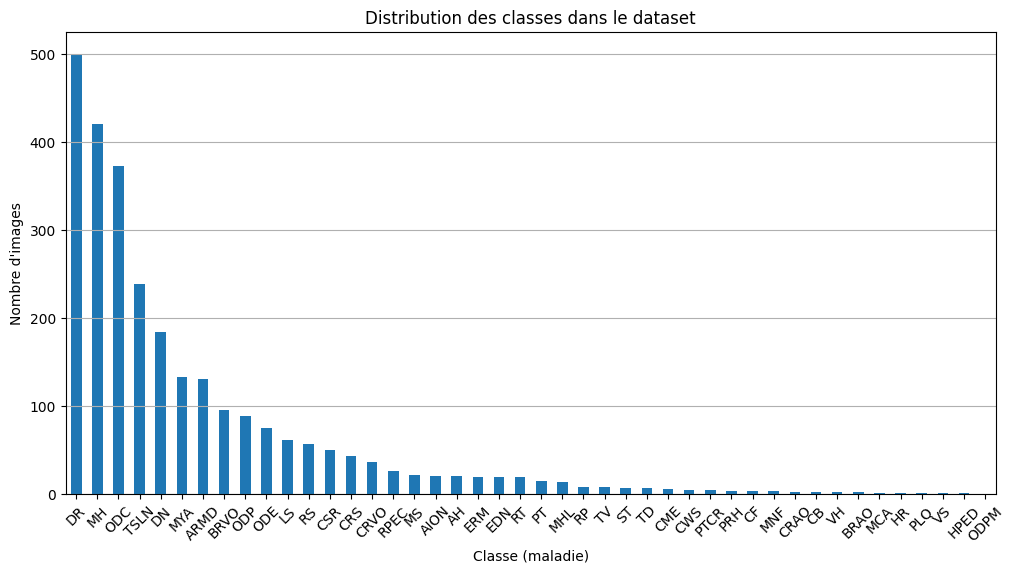

Nombre total d'images: 2560
Nombre moyen de labels par image: 1.06875
Classes les plus fréquentes:
 DR      500
MH      421
ODC     373
TSLN    239
DN      184
MYA     133
ARMD    131
BRVO     96
ODP      89
ODE      75
dtype: int64
Classes les moins fréquentes:
 CRAO    2
CB      2
VH      2
BRAO    2
MCA     1
HR      1
PLQ     1
VS      1
HPED    1
ODPM    0
dtype: int64


In [ ]:
# Compte le nombre d'images par classe (colonnes 2 à 46)
class_counts = df.iloc[:, 2:46].sum().sort_values(ascending=False)

# Affiche la distribution
plt.figure(figsize=(12, 6))
class_counts.plot(kind='bar')
plt.title("Distribution des classes dans le dataset")
plt.xlabel("Classe (maladie)")
plt.ylabel("Nombre d'images")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Affiche les statistiques
print("Nombre total d'images:", len(df))
print("Nombre moyen de labels par image:", df.iloc[:, 2:46].sum(axis=1).mean())
print("Classes les plus fréquentes:\n", class_counts.head(10))
print("Classes les moins fréquentes:\n", class_counts.tail(10))


As we can see, there is a massive desequelibrium between classes. 

In [7]:
df.iloc[:, 1:2].sum()

Disease_Risk    2025
dtype: int64

In [9]:
df.shape[0] - df.iloc[:, 1:2].sum()

Disease_Risk    535
dtype: int64

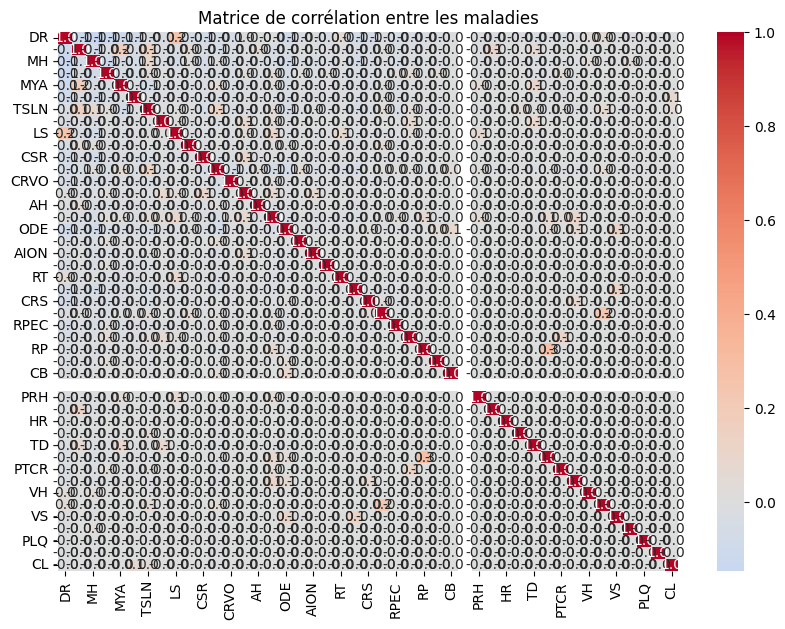

In [6]:
# Sélectionne uniquement les colonnes de labels (à partir de la 3ème colonne)
labels = df.iloc[:, 2:]

# Calcule la matrice de corrélation (méthode de Pearson)
corr_matrix = labels.corr()

# Affiche la heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap="coolwarm", center=0)
plt.title("Matrice de corrélation entre les maladies")
plt.show()

There are no correlation between the variables

In [19]:
# Compte les co-occurrences pour chaque paire de maladies
co_occurrences = {}
for col1, col2 in combinations(labels.columns, 2):
    if ((labels[col1] == 1) & (labels[col2] == 1)).sum() > 0:
        co_occurrences[(col1, col2)] = ((labels[col1] == 1) & (labels[col2] == 1)).sum()

# Trie les paires par fréquence de co-occurrence
sorted_pairs = sorted(co_occurrences.items(), key=lambda x: x[1], reverse=True)[:]


    # Ajoute les ratios de co-occurrence par rapport au total d'images de chaque maladie
sorted_pairs_with_ratios = []
for (col1, col2), count in sorted_pairs:
    ratio_col1 = (count / labels[col1].sum()) * 100
    ratio_col2 = (count / labels[col2].sum()) * 100
    sorted_pairs_with_ratios.append(((col1, col2), count, ratio_col1, ratio_col2))

print("Top 10 des paires de maladies co-occurrentes :")
for (col1, col2), count, ratio_col1, ratio_col2 in sorted_pairs_with_ratios[:]:
    print(f"({col1}, {col2}): {count} images | {ratio_col1:.1f}% {col1} and {ratio_col2:.1f}% {col2}")

Top 10 des paires de maladies co-occurrentes :
(TSLN, ODC): 67 images | 28.0% TSLN and 18.0% ODC
(MH, ODC): 64 images | 15.2% MH and 17.2% ODC
(MH, TSLN): 60 images | 14.3% MH and 25.1% TSLN
(DR, ODC): 56 images | 11.2% DR and 15.0% ODC
(DR, LS): 51 images | 10.2% DR and 82.3% LS
(DR, TSLN): 40 images | 8.0% DR and 16.7% TSLN
(ARMD, TSLN): 35 images | 26.7% ARMD and 14.6% TSLN
(ARMD, MYA): 28 images | 21.4% ARMD and 21.1% MYA
(MYA, ODC): 28 images | 21.1% MYA and 7.5% ODC
(DR, MH): 27 images | 5.4% DR and 6.4% MH
(DN, TSLN): 21 images | 11.4% DN and 8.8% TSLN
(DR, ODP): 17 images | 3.4% DR and 19.1% ODP
(DN, ODC): 17 images | 9.2% DN and 4.6% ODC
(MH, MYA): 14 images | 3.3% MH and 10.5% MYA
(TSLN, ODP): 13 images | 5.4% TSLN and 14.6% ODP
(BRVO, ODC): 10 images | 10.4% BRVO and 2.7% ODC
(ARMD, ODC): 9 images | 6.9% ARMD and 2.4% ODC
(MH, DN): 9 images | 2.1% MH and 4.9% DN
(DN, ODP): 9 images | 4.9% DN and 10.1% ODP
(LS, ODC): 9 images | 14.5% LS and 2.4% ODC
(LS, ODP): 9 images | 14.5